In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

df = pd.read_csv('../data/processed/processed_data_with_features.csv', parse_dates=['TimeStamp'], index_col='TimeStamp')

df.head()

,Open,High,Low,Close,Volume,rolling_mean_10,rolling_std_10,rolling_min_10,rolling_max_10,rolling_mean_20,...,rolling_max_20,rolling_mean_50,rolling_std_50,rolling_min_50,rolling_max_50,price_change,price_change_pct,high_low_range,high_low_range_pct,Target
TimeStamp,,,,,,,,,,,,,,,,,,,,,
2022-01-01 00:00:00,46216.93,46731.39,46208.37,46656.13,1503.33095,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,439.20,0.950301,523.02,1.131873,C
2022-01-01 01:00:00,46656.14,46949.99,46574.06,46778.14,943.81539,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,122.00,0.261488,375.93,0.807166,C
2022-01-01 02:00:00,46778.14,46928.94,46721.96,46811.77,485.16860,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,33.63,0.071893,206.98,0.443004,C
2022-01-01 03:00:00,46811.77,46916.63,46760.12,46813.20,562.88971,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.43,0.003055,156.51,0.334708,C
2022-01-01 04:00:00,46813.21,46887.33,46591.23,46711.05,861.88389,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-102.16,-0.218229,296.10,0.635527,C


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 25686 entries, 2022-01-01 00:00:00 to 2024-12-09 07:00:00
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Open                25686 non-null  float64
 1   High                25686 non-null  float64
 2   Low                 25686 non-null  float64
 3   Close               25686 non-null  float64
 4   Volume              25686 non-null  float64
 5   rolling_mean_10     25677 non-null  float64
 6   rolling_std_10      25677 non-null  float64
 7   rolling_min_10      25677 non-null  float64
 8   rolling_max_10      25677 non-null  float64
 9   rolling_mean_20     25667 non-null  float64
 10  rolling_std_20      25667 non-null  float64
 11  rolling_min_20      25667 non-null  float64
 12  rolling_max_20      25667 non-null  float64
 13  rolling_mean_50     25637 non-null  float64
 14  rolling_std_50      25637 non-null  float64
 15  rolling_min_50    

In [3]:
df.describe()

,Open,High,Low,Close,Volume,rolling_mean_10,rolling_std_10,rolling_min_10,rolling_max_10,rolling_mean_20,...,rolling_min_20,rolling_max_20,rolling_mean_50,rolling_std_50,rolling_min_50,rolling_max_50,price_change,price_change_pct,high_low_range,high_low_range_pct
count,25686.000000,25686.000000,25686.000000,25686.000000,25686.000000,25677.000000,25677.000000,25677.000000,25677.000000,25667.000000,...,25667.000000,25667.000000,25637.00000,25637.000000,25637.000000,25637.000000,25686.000000,25686.000000,25686.000000,25686.000000
mean,39797.566330,39947.248955,39642.831487,39799.644113,3978.423152,39787.982190,230.742767,39441.595518,40129.204342,39774.870071,...,39216.431165,40325.138503,39735.40137,535.110455,38737.034010,40706.268491,2.077782,0.004668,304.417468,0.764808
std,19168.963623,19242.211297,19091.865100,19172.493631,5756.001642,19156.831372,239.785661,18981.647343,19332.704125,19139.292524,...,18858.858717,19418.349185,19086.71668,473.156473,18592.838227,19568.126164,249.155859,0.573612,309.202380,0.667408
min,15648.230000,15769.990000,15476.000000,15649.520000,0.000000,15772.194000,4.411763,15649.520000,15847.820000,15798.326500,...,15649.520000,16015.220000,16004.27600,14.058845,15649.520000,16268.730000,-2971.990000,-6.988965,0.000000,0.000000
25%,24443.147500,24536.432500,24312.612500,24441.515000,856.431097,24439.815000,77.187108,24170.470000,24685.060000,24418.143000,...,23950.970000,24820.920000,24313.43560,205.668779,23637.040000,24922.210000,-73.500000,-0.207537,114.505000,0.366236
50%,34061.600000,34157.880000,33930.000000,34061.440000,1658.883050,34066.986000,154.589550,33668.900000,34227.740000,34061.566000,...,33595.620000,34337.010000,34017.39280,395.435175,31354.420000,34587.640000,1.570000,0.004628,214.690000,0.582246
75%,57612.655000,57890.107500,57354.710000,57615.772500,4818.609810,57662.165000,296.218149,57060.000000,58232.720000,57637.910250,...,56760.405000,58406.070000,57682.88860,709.728626,55761.520000,59347.440000,78.980000,0.220228,383.850000,0.936919
max,103508.000000,104088.000000,102684.730000,103507.990000,137207.188600,102605.001000,2522.089867,101904.020000,103507.990000,101718.003500,...,99350.000000,103507.990000,100051.69520,3601.905299,98884.020000,103507.990000,3069.050000,6.487233,8540.000000,11.093926


In [4]:
print(df.isnull().sum())

Open                   0
High                   0
Low                    0
Close                  0
Volume                 0
rolling_mean_10        9
rolling_std_10         9
rolling_min_10         9
rolling_max_10         9
rolling_mean_20       19
rolling_std_20        19
rolling_min_20        19
rolling_max_20        19
rolling_mean_50       49
rolling_std_50        49
rolling_min_50        49
rolling_max_50        49
price_change           0
price_change_pct       0
high_low_range         0
high_low_range_pct     0
Target                 0
dtype: int64


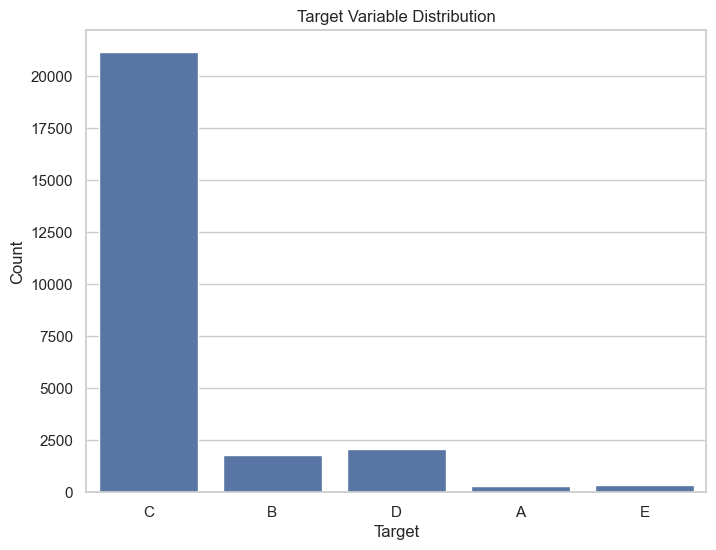

Target Ratio:
 Target
C    0.822977
D    0.080783
B    0.070038
E    0.013860
A    0.012341
Name: proportion, dtype: float64


In [6]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Target', data=df)
plt.title('Target Variable Distribution')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

target_ratio = df['Target'].value_counts(normalize=True)
print("Target Ratio:\n", target_ratio)

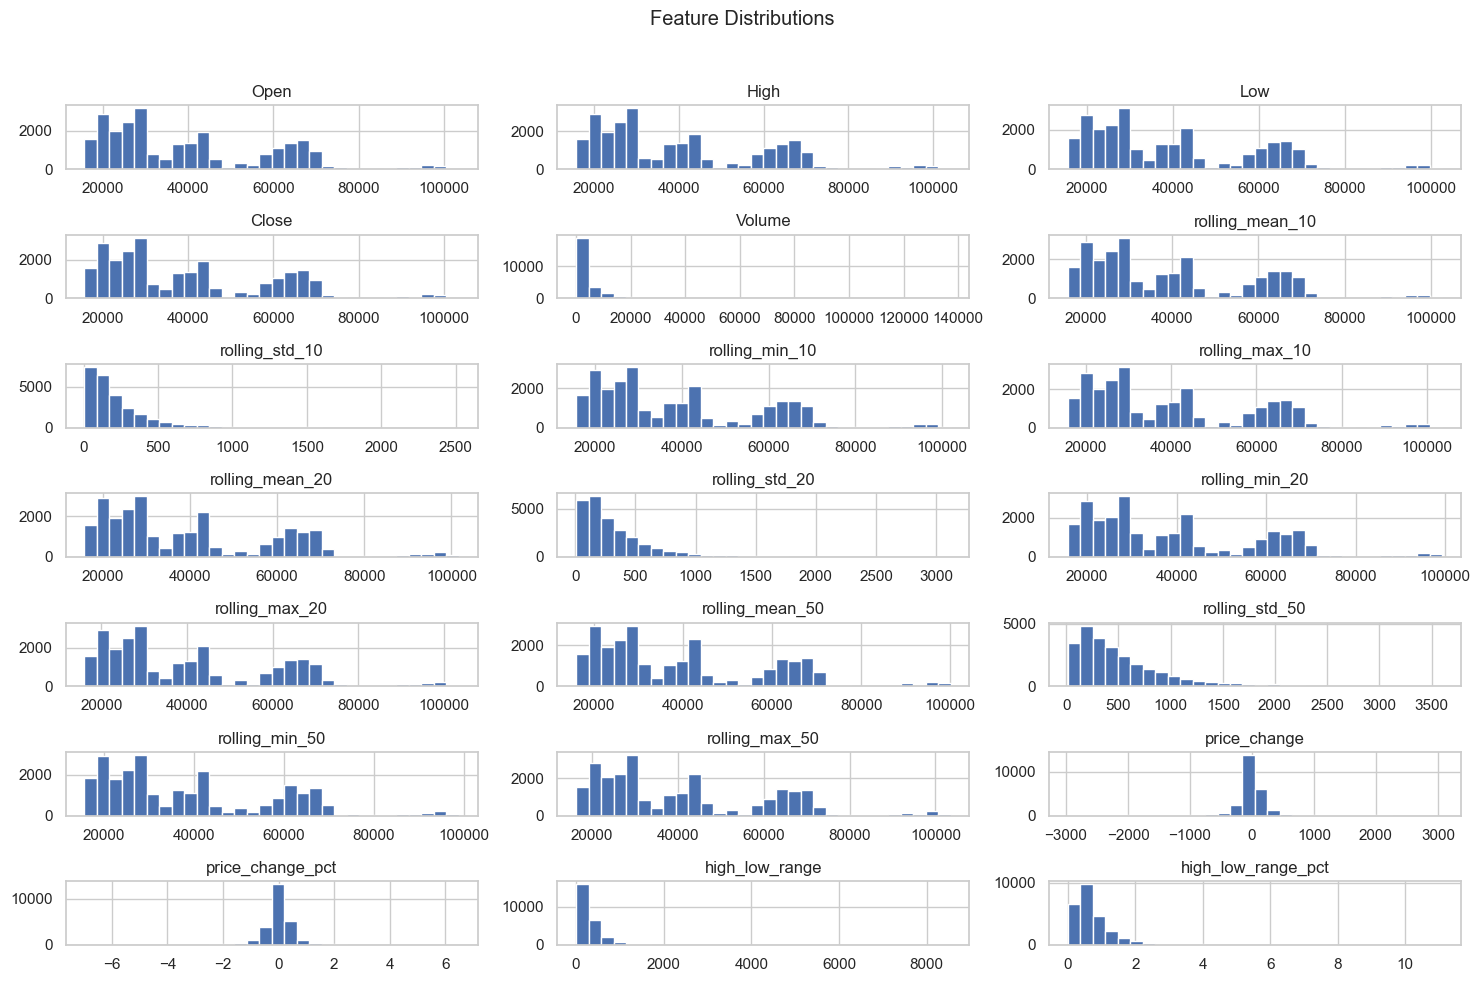

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../data/processed/processed_data_with_features.csv', parse_dates=['TimeStamp'], index_col='TimeStamp')

features = df.columns.drop('Target')
df[features].hist(bins=30, figsize=(15, 10), layout=(7, 3))
plt.suptitle('Feature Distributions')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

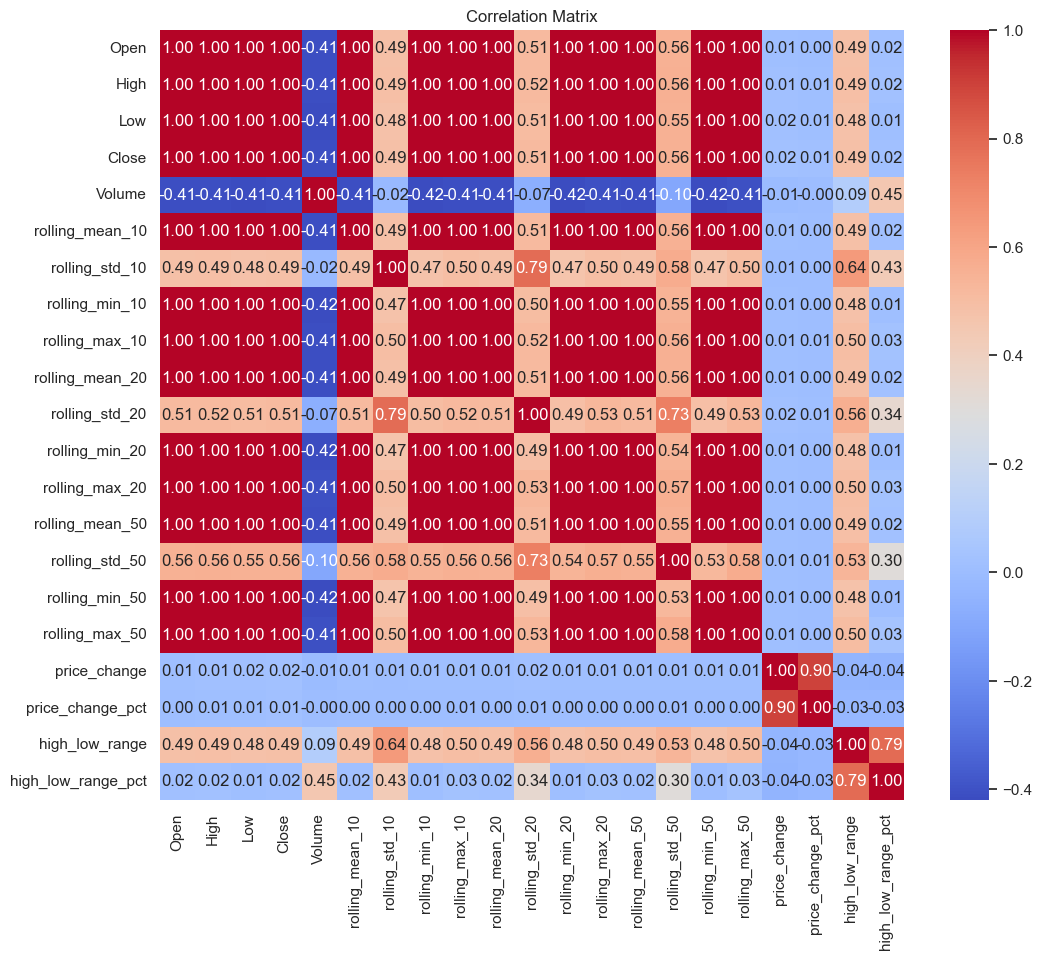

In [12]:
df_numeric = df.select_dtypes(include=[np.number])

corr_matrix = df_numeric.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()